## Final Project Submission

Please fill out:
* Student name: Patrick Routh
* Student pace: Part Time
* Scheduled project review date/time: March 7, 2019 from 6pm-6:45pm ET
* Instructor name: Joe San Pietro
* Blog post URL: TBD


# 1. Identifying and Obtaining our Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Evaluating the Quality of our Data - Scrubbing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Finding and Dealing with Null and Missing Values / Validating Data Types

In [ ]:
df.isna().sum()

#### Id

In [5]:
# Remove id, will not be a useful feature
df = df.drop('id', axis=1)

#### Date

#### Bedrooms - outliers present, data type change required

In [6]:
# change data type from float to int
df.bedrooms = df.bedrooms.astype('int')

#### Waterfront - replace nan values with 0 and data type change required

In [7]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
df.waterfront.isna().sum()

2376

In [9]:
df.waterfront = df.waterfront.replace(np.nan, 0)

In [10]:
# change data type from float to str
df.waterfront = df.waterfront.astype('int')

#### View - data type change required and drop null values

In [11]:
df.view = df.view.astype('str')

In [12]:
df = df[df.view != 'nan']

In [455]:
df.view = df.view.astype('float')

#### Condition - data type change required

In [14]:
# change data type from float to int
df.condition = df.condition.astype('int')

#### Grade - data type change required

In [15]:
# change data type from float to str
df.grade = df.grade.astype('int')

#### Sqft_basement - need to address/remove ? values, change data type to float

In [16]:
# remove records with ? values
df = df[df.sqft_basement != '?']

In [17]:
# change data type from float to int
df.sqft_basement = df.sqft_basement.astype('float')

#### Yr_built

In [18]:
df.yr_built = df.yr_built.astype('int')

#### Yr_renovated - categorical feature

In [19]:
df.yr_renovated.isna().sum()

3742

In [20]:
# replace all NaN values with most common entry, 0
df.yr_renovated = df.yr_renovated.fillna(0)

In [21]:
# cast column as type int
df.yr_renovated = df.yr_renovated.astype('int')

#### Zipcode - categorical feature, data type change required

In [22]:
# change data type from float to int
df.zipcode = df.zipcode.astype('int')

## Removing Outliers

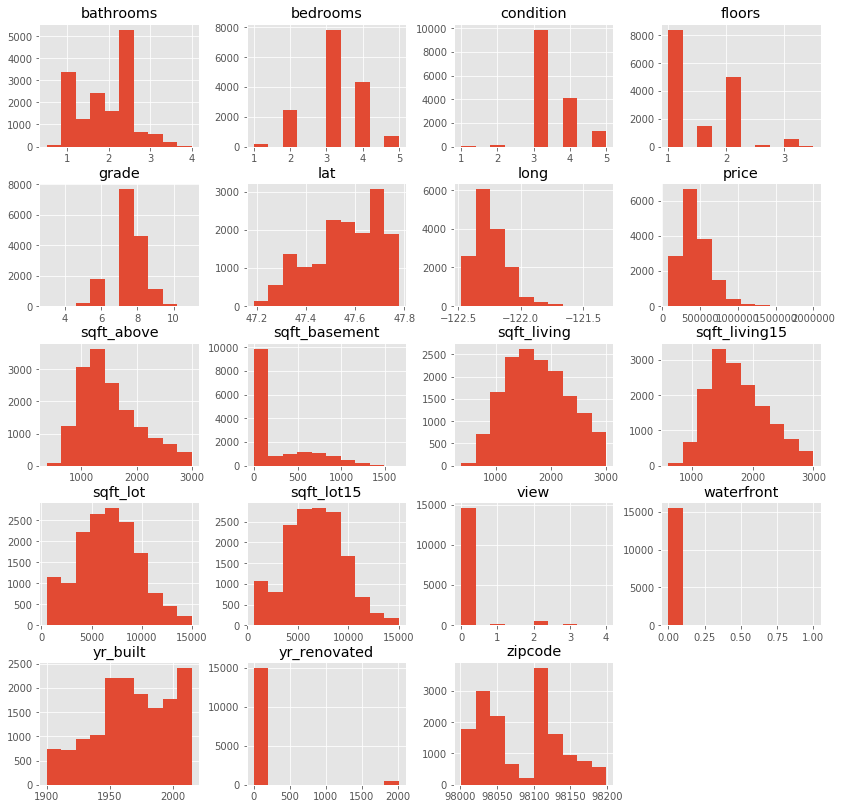

In [420]:
df.hist(figsize = [14,14]);

#### Based on the Histograms above, I chose to eliminate visual outliers from the data set in order to improve my data distributions to more closely resemble normal distributions

In [24]:
df = df[df.bedrooms <= 5]

In [25]:
df = df[df.bathrooms <= 4]

In [26]:
df = df[df.sqft_basement <= 2000]

In [27]:
df = df[df.sqft_living <= 3000]

In [28]:
df = df[df.sqft_living15 <= 3000]

In [29]:
df = df[df.sqft_above <= 3500]

In [30]:
df = df[df.sqft_lot <= 15000]

In [31]:
df = df[df.sqft_lot15 <= 15000]

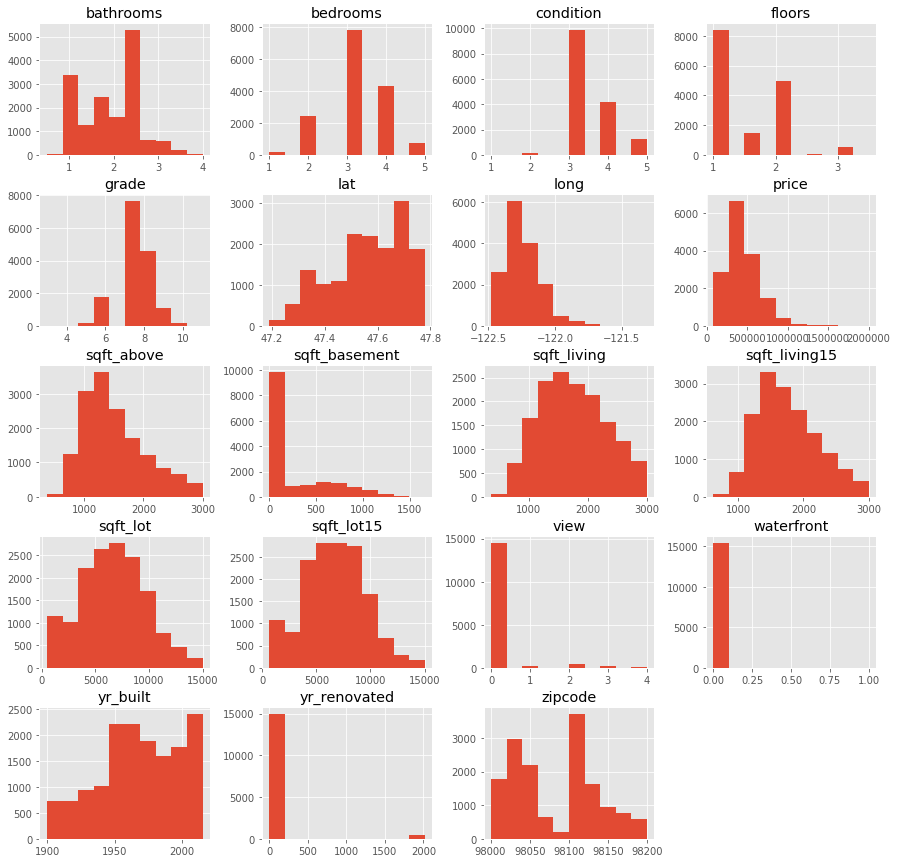

In [421]:
df.hist(figsize = [15,15]);

In [37]:
df_numerical_features = df.copy(deep=True)
df_numerical_features = df_numerical_features.drop(['date', 'waterfront', 'view', 
                                                    'condition', 'grade', 'yr_built', 'yr_renovated', 
                                                    'zipcode', 'lat', 'long'], axis=1)

## Analysis -  Removed Outliers from continuous features

#### Normality Check

Pass - bathrooms, bedrooms, condition, grade, sqft_living, sqft_living15, sqft_lot, sqft_lot15, sqft_above all pass and closely resemble normal distribution

Fail - floors, lat, sqft_basement, long, waterfront, yr_built, yr_renovated, zipcode do not resemble a normal distribution

Summary: Those features that pass the normality check are good candidates for feature predictors while those that fail have a piece of evidence to support their removal.

# 3. Exploratory Data Analysis

## Correlation - Checking for Multicollinearity

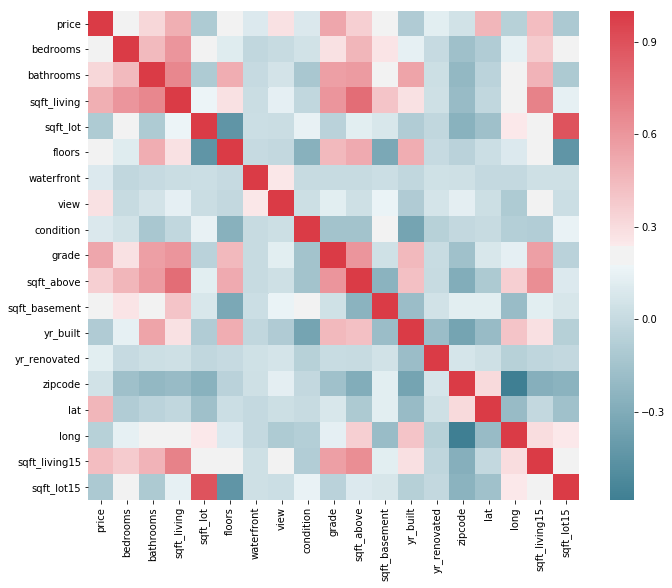

In [35]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), cmap=cmap)

### Multicollinearity Analysis

There is clear evidence of multicollinearity between: 
 - sqft_living, sqft_above, sqft_living15, and grade
 - sqft_lot and sqft_lot15
 - floors and sqft_lot
 - zipcode and long
 
Summary: First piece of evidence that sqft_living and/or sqft_living15 are candidates for feature removal to improve the validity of my future linear regression model.

#### Deeper dive into Numerical Features

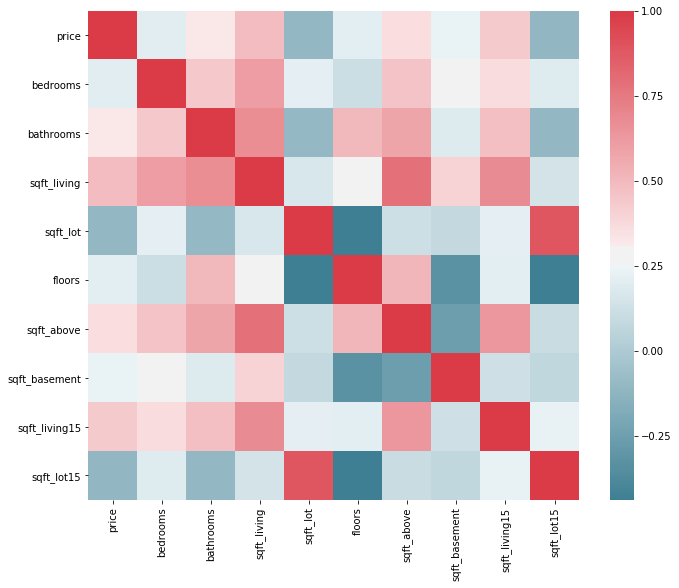

In [38]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_numerical_features.corr(), cmap=cmap)

### Dealing with Categorical Features

In [167]:
df_categorical = df.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

In [168]:
df_categorical.head()

,date,price,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,10/13/2014,221900.0,0,0.0,3,7,0.0,1955,0,98178,47.5112,-122.257
1,12/9/2014,538000.0,0,0.0,3,7,400.0,1951,1991,98125,47.7210,-122.319
2,2/25/2015,180000.0,0,0.0,3,6,0.0,1933,0,98028,47.7379,-122.233
3,12/9/2014,604000.0,0,0.0,5,7,910.0,1965,0,98136,47.5208,-122.393
4,2/18/2015,510000.0,0,0.0,3,8,0.0,1987,0,98074,47.6168,-122.045


In [169]:
df_categorical.dtypes

date              object
price            float64
waterfront         int64
view             float64
condition          int64
grade              int64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

In [170]:
df_categorical['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

In [171]:
df_categorical['no_basement'] = np.where(df['sqft_basement'] > 0, 0, 1)

In [172]:
df_categorical = df_categorical.drop(['sqft_basement'], axis=1)

In [173]:
df_categorical['renovation'] = np.where(df['yr_renovated'] > 0, 1, 0)

In [174]:
df_categorical['no_renovation'] = np.where(df['yr_renovated'] > 0, 0, 1)

In [175]:
df_categorical = df_categorical.drop(['yr_renovated'], axis=1)

In [176]:
df_categorical['no_view'] = np.where(df['view'] == 0, 1, 0)

In [177]:
df_categorical['poor_view'] = np.where(df['view'] == 1, 1, 0)

In [178]:
df_categorical['average_view'] = np.where(df['view'] == 2, 1, 0)

In [179]:
df_categorical['good_view'] = np.where(df['view'] == 3, 1, 0)

In [180]:
df_categorical['great_view'] = np.where(df['view'] == 4, 1, 0)

In [181]:
df_categorical = df_categorical.drop(['view'], axis=1)

In [182]:
df_categorical.head()

,date,price,waterfront,condition,grade,yr_built,zipcode,lat,long,basement,no_basement,renovation,no_renovation,no_view,poor_view,average_view,good_view,great_view
0,10/13/2014,221900.0,0,3,7,1955,98178,47.5112,-122.257,0,1,0,1,1,0,0,0,0
1,12/9/2014,538000.0,0,3,7,1951,98125,47.7210,-122.319,1,0,1,0,1,0,0,0,0
2,2/25/2015,180000.0,0,3,6,1933,98028,47.7379,-122.233,0,1,0,1,1,0,0,0,0
3,12/9/2014,604000.0,0,5,7,1965,98136,47.5208,-122.393,1,0,0,1,1,0,0,0,0
4,2/18/2015,510000.0,0,3,8,1987,98074,47.6168,-122.045,0,1,0,1,1,0,0,0,0


In [183]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

col_names = df_categorical.columns
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_categorical).fit()
    X_new = pd.DataFrame({val: [df_categorical[val].min(), df_categorical[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~date
------------------------------
['date', 0.030747697596098744, 325000.00000008015, 124306.89655164958, 0.5428811734528229]
King County House Sales: Price~price
------------------------------
['price', 1.0, 2.7557689463719726e-10, 0.9999999999999991, 0.0]
King County House Sales: Price~waterfront
------------------------------
['waterfront', 0.010189869076370428, 444927.1432824228, 540043.3112630358, 2.4538464356384544e-36]
King County House Sales: Price~condition
------------------------------
['condition', 0.008895823250537616, 346827.6782684076, 28862.24341536173, 6.43351361452625e-32]
King County House Sales: Price~grade
------------------------------
['grade', 0.2830072902325732, -467124.5752433571, 124507.2081704735, 0.0]
King County House Sales: Price~yr_built
------------------------------
['yr_built', 0.008643899039772363, 1674404.9317461606, -624.3383962778234, 4.660970959733239e-31]
King County House Sales: Price~zipcode
--------------------

In [184]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,date,0.0307477,325000,124307,0.542881
2,price,1,2.75577e-10,1,0
3,waterfront,0.0101899,444927,540043,2.45385e-36
4,condition,0.00889582,346828,28862.2,6.43351e-32
5,grade,0.283007,-467125,124507,0
6,yr_built,0.0086439,1.6744e+06,-624.338,4.66097e-31
7,zipcode,0.0026363,-1.83151e+07,191.273,1.65103e-10
8,lat,0.213276,-3.1355e+07,668634,0
9,long,0.00413863,-1.18432e+07,-100533,1.14504e-15


In [ ]:
# latitude and grade have significantly higher r-squared coefficients

# Normalizing Continuous Features

In [102]:
df_numerical_norm = df_numerical_features.copy(deep=True)
df_numerical_norm = df_numerical_norm.drop(['sqft_basement'], axis=1)

In [103]:
df_numerical_norm.bedrooms = (df_numerical_norm.bedrooms - df_numerical_norm.bedrooms.mean()) / df_numerical_norm.bedrooms.std()
df_numerical_norm.bathrooms = (df_numerical_norm.bathrooms - df_numerical_norm.bathrooms.mean()) / df_numerical_norm.bathrooms.std()
df_numerical_norm.sqft_living = (df_numerical_norm.sqft_living - df_numerical_norm.sqft_living.mean()) / df_numerical_norm.sqft_living.std()
df_numerical_norm.sqft_lot = (df_numerical_norm.sqft_lot - df_numerical_norm.sqft_lot.mean()) / df_numerical_norm.sqft_lot.std()
df_numerical_norm.floors = (df_numerical_norm.floors - df_numerical_norm.floors.mean()) / df_numerical_norm.floors.std()
df_numerical_norm.sqft_living15 = (df_numerical_norm.sqft_living15 - df_numerical_norm.sqft_living15.mean()) / df_numerical_norm.sqft_living15.std()
df_numerical_norm.sqft_lot15 = (df_numerical_norm.sqft_lot15 - df_numerical_norm.sqft_lot15.mean()) / df_numerical_norm.sqft_lot15.std()



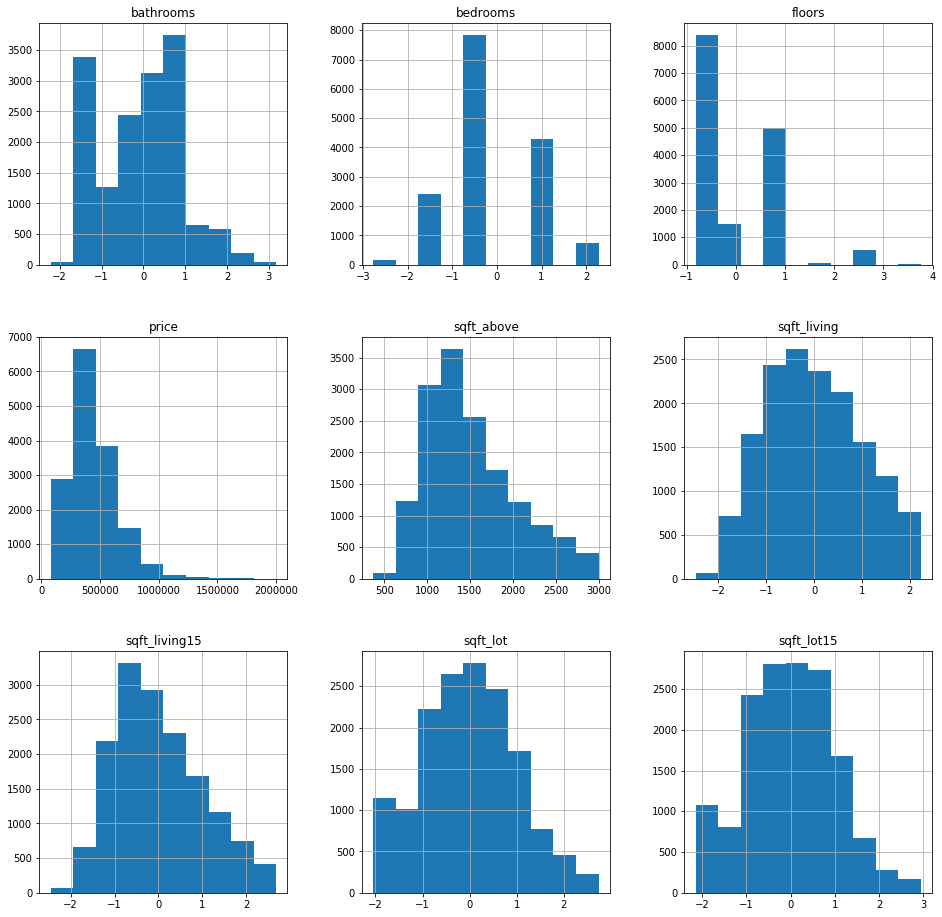

In [104]:
df_numerical_norm.hist(figsize = [16,16]);

In [105]:
df_numerical_log = df_numerical_features.copy(deep=True)
df_numerical_log = df_numerical_log.drop(['sqft_basement'], axis=1)
df_numerical_log["bedrooms"] = np.log(df_numerical_log["bedrooms"])
df_numerical_log["bathrooms"] = np.log(df_numerical_log["bathrooms"])
df_numerical_log["floors"] = np.log(df_numerical_log["floors"])
df_numerical_log["sqft_living"] = np.log(df_numerical_log["sqft_living"])
df_numerical_log["sqft_lot"] = np.log(df_numerical_log["sqft_lot"])
df_numerical_log["sqft_living15"] = np.log(df_numerical_log["sqft_living15"])
df_numerical_log["sqft_lot15"] = np.log(df_numerical_log["sqft_lot15"])

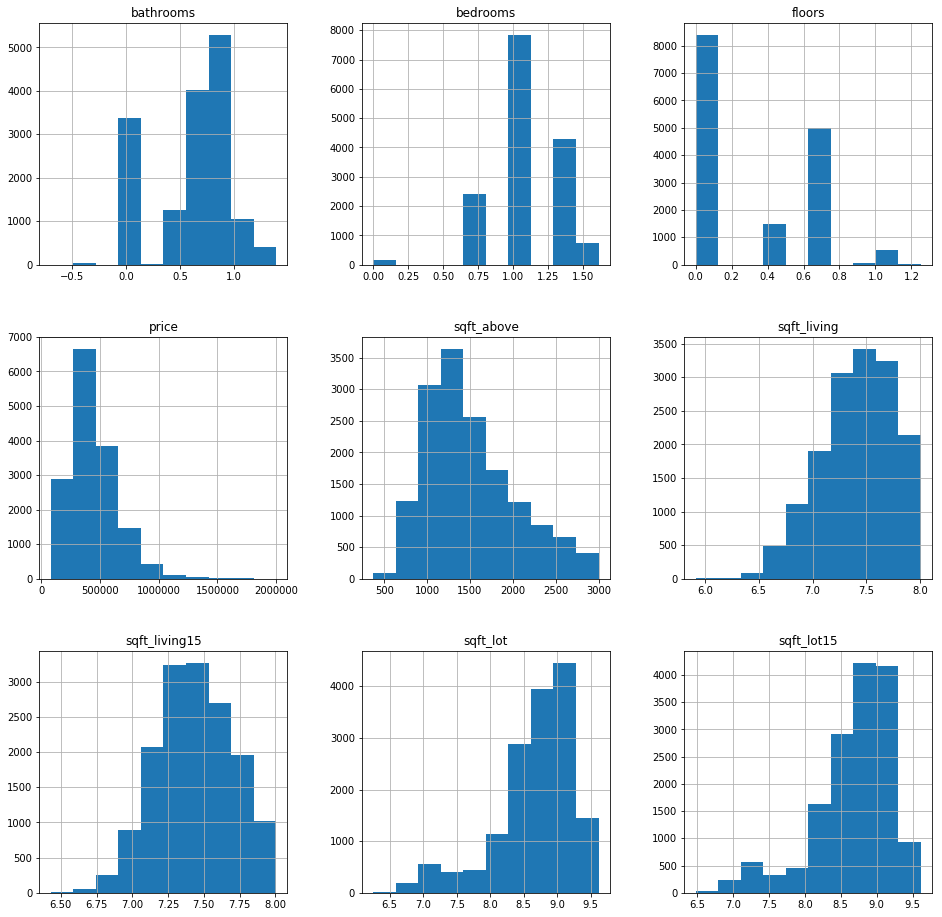

In [106]:
df_numerical_log.hist(figsize = [16,16]);

### Visualizing Data with KDE Plots

In [ ]:
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_living15', 'sqft_lot15']:
    df_numerical_log[column].plot.hist(normed=True )
    df_numerical_log[column].plot.kde(label=column )
    plt.legend()
    plt.show()

In [ ]:
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=df_numerical_log, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

# 4. Fit an Initial Model

## Linear Regression

### Ordinary Least Squares - Statsmodels

### Normalized Transformation

In [ ]:
col_names = df_numerical_norm.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_norm).fit()
    X_new = pd.DataFrame({val: [df_numerical_norm[val].min(), df_numerical_norm[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

In [108]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0391779,445695,39900.6,1.72265e-136
2,bathrooms,0.105308,445695,65416.9,0
3,sqft_living,0.243543,445695,99482.7,0
4,sqft_lot,0.0103501,445695,-20508.4,6.95798e-37
5,floors,0.0421414,445695,41382.2,6.94948e-147
6,sqft_above,0.131246,236498,138.321,0
7,sqft_living15,0.19014,445695,87901.4,0
8,sqft_lot15,0.0119108,445695,-22000.4,3.23556e-42


### Log Scale Transformation

In [ ]:
col_names = df_numerical_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log).fit()
    X_new = pd.DataFrame({val: [df_numerical_log[val].min(), df_numerical_log[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

In [113]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0374287,282371,144752,2.27424e-130
2,bathrooms,0.101996,342266,173022,0
3,sqft_living,0.224383,-1.62561e+06,279387,0
4,sqft_lot,0.00778309,707262,-30156,4.04509e-28
5,floors,0.0468136,407965,123907,2.4608e-163
6,sqft_above,0.131246,236498,138.321,0
7,sqft_living15,0.184131,-1.9857e+06,326934,0
8,sqft_lot15,0.00960951,762671,-36470.1,2.35377e-34


### Log Transform target variable, 'price'

In [114]:
df_numerical_log["price"] = np.log(df_numerical_log["price"])

In [115]:
col_names = df_numerical_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log).fit()
    X_new = pd.DataFrame({val: [df_numerical_log[val].min(), df_numerical_log[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~bedrooms
------------------------------
['bedrooms', 0.04486883676686104, 12.529572324025352, 0.34051969513335445, 1.7704220430617153e-156]
King County House Sales: Price~bathrooms
------------------------------
['bathrooms', 0.1289357583455808, 12.663926438489508, 0.4179686699917191, 0.0]
King County House Sales: Price~sqft_living
------------------------------
['sqft_living', 0.2517211647310106, 8.200145050319286, 0.6357953285156915, 0.0]
King County House Sales: Price~sqft_lot
------------------------------
['sqft_lot', 0.014470868647892488, 13.680083102373283, -0.08834695827709771, 5.649524277123025e-51]
King County House Sales: Price~floors
------------------------------
['floors', 0.057956022707226884, 12.823581977953104, 0.2962149950019244, 6.914863957937709e-203]
King County House Sales: Price~sqft_above
------------------------------
['sqft_above', 0.13728681227309014, 12.454081505034896, 0.0003039536380003758, 0.0]
King County House Sales: Price

In [116]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0448688,12.5296,0.34052,1.77042e-156
2,bathrooms,0.128936,12.6639,0.417969,0
3,sqft_living,0.251721,8.20015,0.635795,0
4,sqft_lot,0.0144709,13.6801,-0.088347,5.64952e-51
5,floors,0.057956,12.8236,0.296215,6.91486e-203
6,sqft_above,0.137287,12.4541,0.000303954,0
7,sqft_living15,0.202939,7.42947,0.73744,0
8,sqft_lot15,0.0170393,13.8207,-0.104342,8.90014e-60


### Analysis after an iteration of OLS

Sqft_living and sqft_living15 have exceptionally higher r-squared coefficients than the other features

Summary: A second important piece of evidence that both are candidates for removal. At this point, I will make the decision to remove both features and then rerun the OLS model to see how the remaining features fare.

In [117]:
df_numerical_log_2 = df_numerical_log.copy(deep=True)

In [118]:
df_numerical_log_2 = df_numerical_log_2.drop(['sqft_living', 'sqft_living15'], axis=1)

In [456]:
df_numerical_log_2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_lot15'], dtype='object')

In [458]:
col_names = df_numerical_log_2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log_2).fit()
    X_new = pd.DataFrame({val: [df_numerical_log_2[val].min(), df_numerical_log_2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~bedrooms
------------------------------
['bedrooms', 0.04486883676686104, 12.529572324025352, 0.34051969513335445, 1.7704220430617153e-156]
King County House Sales: Price~bathrooms
------------------------------
['bathrooms', 0.1289357583455808, 12.663926438489508, 0.4179686699917191, 0.0]
King County House Sales: Price~sqft_above
------------------------------
['sqft_above', 0.13728681227309014, 12.454081505034896, 0.0003039536380003758, 0.0]
King County House Sales: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.0170393362443364, 13.820656624177893, -0.10434201916295827, 8.900140917626789e-60]


In [459]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0448688,12.5296,0.34052,1.77042e-156
2,bathrooms,0.128936,12.6639,0.417969,0
3,sqft_above,0.137287,12.4541,0.000303954,0
4,sqft_lot15,0.0170393,13.8207,-0.104342,8.90014e-60


### Analysis - second iteration of OLS

Feature Assessment
So far, I have only removed id, sqft_living, and sqft_living15

Now, I have enough evidence to remove additional features that do not meet the necessary conditions.

Next, I am removing floors and sqft_lot as they had high correlation between the two features, floors is does not fit a normal distribution and both have very low r-squared coefficients.

In [159]:
df_numerical_log_2 = df_numerical_log_2.drop(['sqft_lot', 'floors'], axis=1)

In [460]:
col_names = df_numerical_log_2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log_2).fit()
    X_new = pd.DataFrame({val: [df_numerical_log_2[val].min(), df_numerical_log_2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~bedrooms
------------------------------
['bedrooms', 0.04486883676686104, 12.529572324025352, 0.34051969513335445, 1.7704220430617153e-156]
King County House Sales: Price~bathrooms
------------------------------
['bathrooms', 0.1289357583455808, 12.663926438489508, 0.4179686699917191, 0.0]
King County House Sales: Price~sqft_above
------------------------------
['sqft_above', 0.13728681227309014, 12.454081505034896, 0.0003039536380003758, 0.0]
King County House Sales: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.0170393362443364, 13.820656624177893, -0.10434201916295827, 8.900140917626789e-60]


In [461]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0448688,12.5296,0.34052,1.77042e-156
2,bathrooms,0.128936,12.6639,0.417969,0
3,sqft_above,0.137287,12.4541,0.000303954,0
4,sqft_lot15,0.0170393,13.8207,-0.104342,8.90014e-60


In [ ]:
# Remove sqft_lot15 and bedrooms

In [462]:
df_numerical_log_3 = df_numerical_log_2.drop(['sqft_lot15', 'bedrooms'], axis=1)

In [463]:
col_names = df_numerical_log_3.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log_3).fit()
    X_new = pd.DataFrame({val: [df_numerical_log_3[val].min(), df_numerical_log_3[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~bathrooms
------------------------------
['bathrooms', 0.1289357583455808, 12.663926438489508, 0.4179686699917191, 0.0]
King County House Sales: Price~sqft_above
------------------------------
['sqft_above', 0.13728681227309014, 12.454081505034896, 0.0003039536380003758, 0.0]


In [464]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bathrooms,0.128936,12.6639,0.417969,0
2,sqft_above,0.137287,12.4541,0.000303954,0


### Statsmodels OLS Linear Model

In [162]:
df_numerical_log_features = df_numerical_log_2.copy(deep=True)

In [163]:
df_numerical_log_features = df_numerical_log_features.drop('price', axis=1)

In [164]:
df_numerical_log_features.columns

Index(['bedrooms', 'bathrooms', 'sqft_above', 'sqft_lot15'], dtype='object')

In [467]:
df_numerical_log_3_features = df_numerical_log_3.drop('price', axis=1)

In [468]:
X = df_numerical_log_3_features
y = df_numerical_log_3.price

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     1571.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:52:35   Log-Likelihood:                -7577.5
No. Observations:               15474   AIC:                         1.516e+04
Df Residuals:                   15471   BIC:                         1.518e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4587      0.010   1293.236      0.000      12.440      12.478
bathrooms      0.2534      0.010     24.236      0.000       0.233       0.274
sqft_above     0.0002   7.37e-06     27.255      0.000       0.000       0.000
==============================================================================
Omnibus:                      164.433   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.333
Skew:                           0.067   Prob(JB):                     1.81e-24
Kurtosis:                       2.611   Cond. No.                     5.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
df_combined_take_2 = df.copy(deep=True)
df_combined_take_2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [403]:
df_combined_take_2_features['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

In [404]:
df_combined_take_2_features['no_basement'] = np.where(df['sqft_basement'] > 0, 0, 1)

In [406]:
df_combined_take_2_features['renovation'] = np.where(df['yr_renovated'] > 0, 1, 0)

In [407]:
df_combined_take_2_features['no_renovation'] = np.where(df['yr_renovated'] > 0, 0, 1)

In [409]:
df_combined_take_2_features['no_view'] = np.where(df['view'] == 0, 1, 0)

In [410]:
df_combined_take_2_features['poor_view'] = np.where(df['view'] == 1, 1, 0)

In [411]:
df_combined_take_2_features['average_view'] = np.where(df['view'] == 2, 1, 0)

In [412]:
df_combined_take_2_features['good_view'] = np.where(df['view'] == 3, 1, 0)

In [413]:
df_combined_take_2_features['great_view'] = np.where(df['view'] == 4, 1, 0)

In [402]:
df_combined_take_2_features = df_combined_take_2_features.drop(['sqft_basement', 'yr_renovated', 'view', 'price', 
                                                                'date', 'floors', 'sqft_living', 'sqft_living15'], 
                                                               axis=1)

In [415]:
df_combined_take_2_features.head()

,bedrooms,bathrooms,sqft_lot,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,...,sqft_lot15,basement,no_basement,renovation,no_renovation,no_view,poor_view,average_view,good_view,great_view
0,3,1.00,5650,0,3,7,1180,1955,98178,47.5112,...,5650,0,1,0,1,1,0,0,0,0
1,3,2.25,7242,0,3,7,2170,1951,98125,47.7210,...,7639,1,0,1,0,1,0,0,0,0
2,2,1.00,10000,0,3,6,770,1933,98028,47.7379,...,8062,0,1,0,1,1,0,0,0,0
3,4,3.00,5000,0,5,7,1050,1965,98136,47.5208,...,5000,1,0,0,1,1,0,0,0,0
4,3,2.00,8080,0,3,8,1680,1987,98074,47.6168,...,7503,0,1,0,1,1,0,0,0,0


### Post-Round of Elimination OLS

In [416]:
X = df_combined_take_2_features
y = df_combined_take_2.price

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1561.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:53:37   Log-Likelihood:            -2.0294e+05
No. Observations:               15474   AIC:                         4.059e+05
Df Residuals:                   15455   BIC:                         4.061e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.845e+06   9.38e+05      5.168      0.000    3.01e+06    6.68e+06
bedrooms      -8546.7526   1549.267     -5.517      0.000   -1.16e+04   -5510.007
bathrooms      2.366e+04   2418.370      9.784      0.000    1.89e+04    2.84e+04
sqft_lot         -3.4434      0.713     -4.827      0.000      -4.842      -2.045
waterfront     2.555e+05   2.96e+04      8.622      0.000    1.97e+05    3.14e+05
condition      2.697e+04   1624.332     16.603      0.000    2.38e+04    3.02e+04
grade          9.048e+04   1645.317     54.992      0.000    8.73e+04    9.37e+04
sqft_above      123.2988      3.308     37.277      0.000     116.816     129.782
yr_built      -2196.4591     49.109    -44.727      0.000   -2292.718   -2100.200
zipcode        -336.9305     23.478    -14.351      0.000    -382.950    -290.911
lat            5.489e+05   7619.612     72.039      0.000    5.34e+05    5.64e+05
long          -2285.9476   1.01e+04     -0.227      0.820    -2.2e+04    1.74e+04
sqft_lot15       -4.3582      0.758     -5.749      0.000      -5.844      -2.872
basement       2.455e+06   4.69e+05      5.237      0.000    1.54e+06    3.37e+06
no_basement     2.39e+06   4.69e+05      5.099      0.000    1.47e+06    3.31e+06
renovation      2.44e+06   4.69e+05      5.206      0.000    1.52e+06    3.36e+06
no_renovation  2.405e+06   4.69e+05      5.129      0.000    1.49e+06    3.32e+06
no_view        8.482e+05   1.87e+05      4.532      0.000    4.81e+05    1.22e+06
poor_view      9.436e+05   1.88e+05      5.024      0.000    5.76e+05    1.31e+06
average_view   9.343e+05   1.88e+05      4.981      0.000    5.67e+05     1.3e+06
good_view      9.996e+05   1.88e+05      5.322      0.000    6.31e+05    1.37e+06
great_view     1.119e+06   1.88e+05      5.949      0.000    7.51e+05    1.49e+06
==============================================================================
Omnibus:                     4784.782   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28713.535
Skew:                           1.352   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                     2.16e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Sci-Kit Learn Linear Regression Model

In [309]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [310]:
linreg.coef_

array([-1.14537406e+04,  1.54569356e+04,  5.35013049e+01, -3.29308416e+00,
        1.03918394e+04,  2.53378678e+05,  2.72987612e+04,  8.29265765e+04,
        4.84701229e+01, -2.12150423e+03, -3.09359612e+02,  5.38156539e+05,
       -1.96506921e+04,  5.45638762e+01, -5.81578081e+00,  1.43872574e+04,
       -1.43872574e+04,  2.08895906e+04, -2.08895906e+04, -1.05063493e+05,
       -2.56647098e+04, -3.21497189e+04,  2.48451936e+04,  1.38032728e+05])

In [311]:
linreg.intercept_

6176914.1593586635

In [312]:
# No difference in coefficients between Statsmodels and Sci-Kit Learn Linear Regression Model outputs

## Feature Selection

#### Goal
Determine what features are most important, only include these features into my final model

#### Transform
 - Create variance threshold, set variance threshold on X data, then transform

#### Drop
Features that have variance below set threshold are dropped, using training data to calculate variance
 - Training Data - learn on this data set
 - Test Data - final model then run on Test Data, algo can be then applied to other data sets


#### Benefits
 - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
 - Improves Accuracy: Less misleading data means modeling accuracy improves.
 - Reduces Training Time: Less data means that algorithms train faster.

In [313]:
df_linreg_numerical_log = df_numerical_log.copy(deep=True)

### Recursive Feature Elimination

Given an external estimator that assigns weights to features, RFE selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each. Then, features whose absolute weights are the smallest are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features is eventually reached.

Needs feature importance based on some evaluation: coefficient

In [314]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [380]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)

In [381]:
selector = selector.fit(X, y)

In [382]:
# Pre-Scaling - Ranking: 
selector.ranking_

array([ 6,  5, 13,  1,  2,  3,  1,  9, 10,  7, 11,  8,  1,  4, 12])

In [383]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

In [384]:
no_scale = selector.ranking_

In [385]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [386]:
# regression coefficients
linreg.coef_

array([-1.35755608e+04,  1.98029995e+04, -4.23787704e+00,  3.05181737e+05,
        5.04012585e+04,  2.46332148e+04,  9.08155616e+04,  1.26033646e+02,
        9.86311323e+01, -2.12889975e+03,  1.68134034e+01, -3.37695281e+02,
        5.47113318e+05, -1.18421668e+04, -4.53274487e+00])

#### Transform

In [322]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [324]:
scaled_data

array([[0.5       , 0.14285714, 0.30798479, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.8365019 , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.14285714, 0.15209125, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25      , 0.07142857, 0.24714829, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.57142857, 0.46768061, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.07142857, 0.24714829, ..., 0.        , 0.        ,
        0.        ]])

In [325]:
linreg.fit(scaled_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [326]:
linreg.coef_

array([-4.82346137e+04,  5.41772205e+04,  1.39374421e+05, -4.74220408e+04,
        2.58564814e+04,  2.52146335e+05,  1.09239373e+05,  6.62893987e+05,
        1.29444273e+05, -2.43851431e+05, -6.11881622e+04,  3.16537057e+05,
       -2.28457472e+04,  1.29739247e+05, -8.33150421e+04,  1.46255431e+18,
        1.46255431e+18,  4.19190641e+15,  4.19190641e+15, -7.13933912e+16,
       -7.13933912e+16, -7.13933912e+16, -7.13933912e+16, -7.13933912e+16])

In [327]:
selector = selector.fit(scaled_data, y)

In [328]:
# Scaling - Top 5 Rankings: sqft_living, sqft_above, , grade, view
selector.ranking_

array([17, 11,  4, 12, 20,  5,  9,  1, 16,  6, 13,  3, 24,  7,  8, 19, 23,
       22, 18, 10, 15, 14, 21,  2])

In [329]:
scaled = selector.ranking_ 

In [330]:
features = pd.DataFrame({'Columns': X.columns,
                         'Not_Scaled': no_scale,
                         'Scaled': scaled})

In [331]:
features

,Columns,Not_Scaled,Scaled
0,bedrooms,15,17
1,bathrooms,11,11
2,sqft_living,20,4
3,sqft_lot,24,12
4,floors,17,20
5,waterfront,4,5
6,condition,9,9
7,grade,5,1
8,sqft_above,22,16
9,yr_built,18,6


Text(0, 0.5, 'Features Importance')

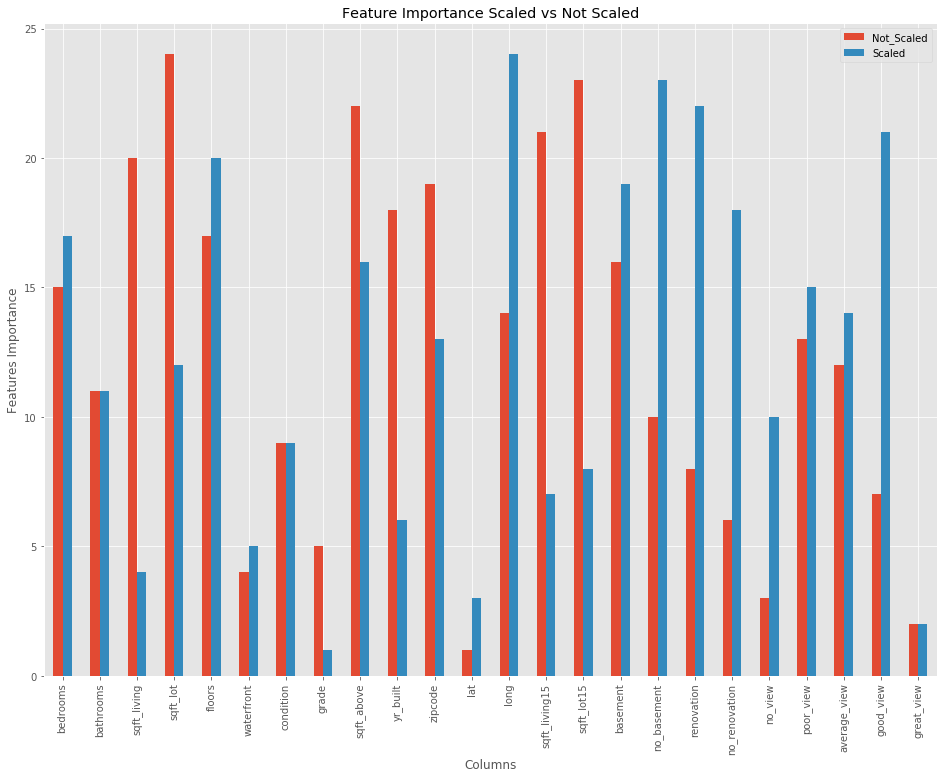

In [333]:
plt.style.use('ggplot')
ax = features.set_index('Columns').plot(kind = 'bar', figsize = [16, 12])
ax.set_title('Feature Importance Scaled vs Not Scaled')
ax.set_ylabel('Features Importance')

In [334]:
X[X.columns[selector.support_]].head()

,grade
0,7
1,7
2,6
3,7
4,8


In [335]:
r_squared = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data, y)
    linreg.fit(X[X.columns[selector.support_]], y)
    r_sq = linreg.score(X[X.columns[selector.support_]], y)
    r_squared.append(r_sq)

In [336]:
r_squared

[0.283007290232573,
 0.3000957923876403,
 0.47569801817114743,
 0.5379055960104329,
 0.5394499329926378,
 0.6075734322922943,
 0.6136741368616785,
 0.6291713997778203,
 0.6355588933955545,
 0.6432733249183118,
 0.6448288442396273,
 0.6453471100933097,
 0.6495694508893576,
 0.6499563208387671,
 0.6503171295813436,
 0.6510450313965237,
 0.6523142658294561,
 0.6533721103922459,
 0.6545460508559493,
 0.654852506085277,
 0.654852506085277,
 0.654852506085277,
 0.654852506085277]

In [337]:
len(X.columns)

24

Text(0.5, 0, 'Number of Features')

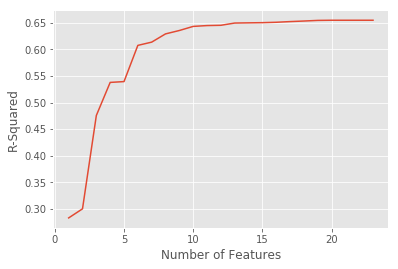

In [338]:
plt.plot(range(1, len(X.columns)), r_squared)
plt.ylabel('R-Squared')
plt.xlabel('Number of Features')

In [339]:
r_squared

[0.283007290232573,
 0.3000957923876403,
 0.47569801817114743,
 0.5379055960104329,
 0.5394499329926378,
 0.6075734322922943,
 0.6136741368616785,
 0.6291713997778203,
 0.6355588933955545,
 0.6432733249183118,
 0.6448288442396273,
 0.6453471100933097,
 0.6495694508893576,
 0.6499563208387671,
 0.6503171295813436,
 0.6510450313965237,
 0.6523142658294561,
 0.6533721103922459,
 0.6545460508559493,
 0.654852506085277,
 0.654852506085277,
 0.654852506085277,
 0.654852506085277]

In [340]:
from sklearn.metrics import mean_squared_error

In [341]:
mse = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data, y)
    linreg.fit(X[X.columns[selector.support_]], y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(y, y_pred))

In [342]:
mse

[29134362127.375233,
 28439986015.571175,
 21304545492.04156,
 18776795802.055855,
 18714043040.035652,
 15945905134.388073,
 15698008421.164555,
 15068290902.936966,
 14808740771.380215,
 14495271696.27099,
 14432064549.830086,
 14411005277.045662,
 14239434207.91003,
 14223714091.026342,
 14209052948.14198,
 14179475304.202599,
 14127901090.00232,
 14084916515.477438,
 14037214487.103111,
 14024761950.967896,
 14024761950.967896,
 14024761950.967896,
 14024761950.967897]

Text(0.5, 0, 'Number of Features')

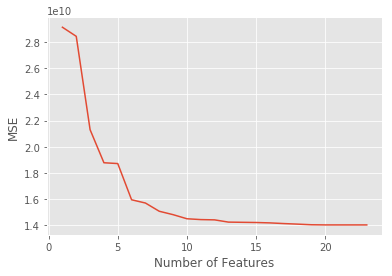

In [343]:
plt.plot(range(1, len(X.columns)), mse)
plt.ylabel('MSE')
plt.xlabel('Number of Features')

Text(0.5, 0, 'Number of Features')

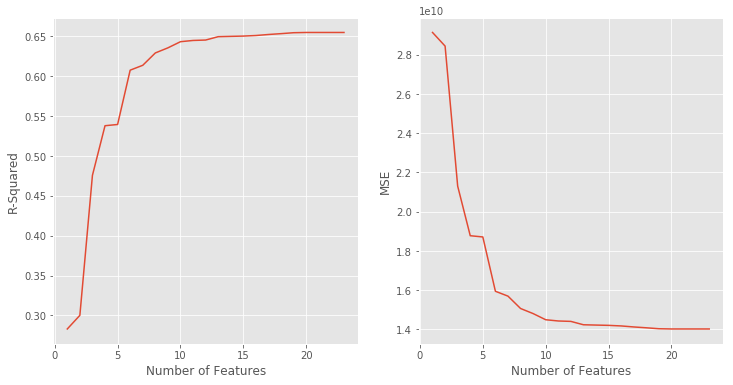

In [344]:
fig = plt.figure(figsize =(12,6))

ax1 = plt.subplot(121)
ax1.plot(range(1, len(X.columns)), r_squared)
ax1.set_ylabel('R-Squared')
ax1.set_xlabel('Number of Features')

ax2 = plt.subplot(122)
ax2.plot(range(1, len(X.columns)), mse)
ax2.set_ylabel('MSE')
ax2.set_xlabel('Number of Features')

### Analysis
3 or 4 seems to be the magic number. I will now iterate through feature selection to get to my list of 3-4 features

In [346]:
linreg = LinearRegression()
r_list = []
adj_r_list = []
list_n = list(range(1, len(X.columns)))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

0.21327573758116902
0.21205356253436647
0.23640634393258975
0.2352201022505639
0.28209826816600236
0.28098300882468474
0.2830079332457429
0.2818940870678607
0.5033572891317878
0.5025857553716198
0.5110044380303886
0.5102447841053921
0.512057287081839
0.5112992687563787
0.512057287081839
0.5112992687563787
0.5382759779878321
0.5375586903622064
0.544404499222924
0.543696732246508
0.5494518504116441
0.5487519244882756
0.5494531648865699
0.5487532410052364
0.5494531648865698
0.5487532410052363
0.549607827984108
0.5489081443716812
0.5531723673744309
0.5524782212689863
0.5531723673744309
0.5524782212689863
0.5537184182074888
0.5530251203912534
0.6093153760890244
0.6087084480694851
0.6133769705188461
0.6127763521806011
0.6391675235207752
0.6386069707707266
0.644735959345605
0.6441840571528608
0.6458170140950421
0.6452667913193466
0.6544648813630993
0.6539280930371698


In [275]:
# The difference between r-squared and adjusted r-squared is negligible, and seems to continue to increase 
#as we include more features = overfitting. 
# In order to identify this, let's rerun using a train test split.

# 5. Revise the Fitted Model

## Model Validation

Goal develop a robust model without underfitting or overfitting

Mean Squared Error - area of error in y-direction from regression line and actual values - take mean of all errors
  - minimize MSE for a better model, actual closer to predicted values

## Train-Test-Split

Creating train and test sets of data (20% test, 80% train)
Calculate the residuals and MSE

In [431]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(1, len(X.columns)))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print('mse_train', mse_train)
    print('mse_test', mse_test)   

MSE_test.append(mse_test)
MSE_train.append(mse_train)

mse_train 32442966440.159534
mse_test 30070373622.3864
mse_train 31478585228.47774
mse_test 29228331511.56251
mse_train 31413381127.088924
mse_test 29262914589.34272
mse_train 29524991718.222836
mse_test 27576849092.304897
mse_train 20714203836.485718
mse_test 18048379793.720894
mse_train 20399778223.536278
mse_test 17752057661.53013
mse_train 20354954965.23795
mse_test 17717512555.444405
mse_train 20354954965.237946
mse_test 17717512555.444397
mse_train 19321563495.63685
mse_test 16525705251.044144
mse_train 19056052951.221
mse_test 16343852189.024103
mse_train 19055987314.803566
mse_test 16343850267.396894
mse_train 19055987314.80357
mse_test 16343850267.39691
mse_train 18850198240.092606
mse_test 16141414245.142942
mse_train 18842308686.53663
mse_test 16141873646.218634
mse_train 18712421444.598866
mse_test 15939606602.900919
mse_train 18712421444.598877
mse_test 15939606602.900928
mse_train 16507235065.06665
mse_test 14397417014.998768
mse_train 16379001883.25771
mse_test 142904860

In [430]:
len(X_train), len(X_test), len(y_train), len(y_test)

(12379, 3095, 12379, 3095)

### Train-Test-Split Analysis
Difference in MSE between train and test data above. Results dependent upon train-test-split, which is different each time you run the RFE. We may have better luck with cross-validation which does not depend upon the variability of randomly splitting our data in advance of MSE calculations.

### Cross Validation

cross_val_score - linreg instance, features in df, target, setting cv=10 cross validation (splitting into 10), scoring is MSE

In [437]:
df_combined_take_2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [447]:
df_combined_take_3_features = df.drop(['price', 'date'], axis=1)
X = df_combined_take_3_features
y = df.price

In [448]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select_10 = RFE(linreg, n_features_to_select = 10)
select_10 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

print(cv_10_results)
print(selected_columns)

[-1.23124757e+10 -1.65853008e+10 -1.45073409e+10 -1.37388076e+10
 -1.59830205e+10 -1.41860114e+10 -1.35027445e+10 -1.52040757e+10
 -1.38988694e+10 -1.21986534e+10]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [449]:
cv_10_results_new = -cv_10_results

In [450]:
np.mean(cv_10_results_new)

14211730003.628235

## Summary of Approach

### Obtain

The available data set, kc_house_data.csv, was accessible in the repo and easily read into a Pandas Data Frame for me to start to understand at a deeper level in terms of size, context, and value of the given data.

### Scrub

The scrubbing process entailed dealing with null/missing values, user input errors, questionable values, impractical features, many outliers that all affected the integrity of the data set as a whole. Addressing data types and navigating the unique values in each column helped me to understand the level of significance of each feature combined with my business knowledge and common sense. Removing the null/missing values still left me with a large number of records to work with. Once I saw a number of outliers for many features in the histograms, I could easily remove such values resulting in more normal distributions. The histograms provided a first piece of evidence for features that do not represent a normal distribution.

### Explore

Exploring the data set consisted of first understanding the relationships (based on measured correlation) between the features themselves, before we even take the target variable into account. Checking for multicollinearity by constructing a heatmap gave me a second helpful reference point/piece of evidence for features that are candidates for removal. Transformation also played a key part as scale is important when comparing features and their values. In order to uniformly compare these values, they need to be transformed. I used log scaling and normalization in parallel, but decided to stick with log scaling as I saw better results.

### Model

Running intial OLS models on the features gives me a third piece of evidence that would speak to the value of a feature in these linear regression models or an additional data point indicating that it is a good candidate for removal. This iterative process through feature elimination further improves our model's performance. I implemented certain checks on the model as well to ensure that it is robust and not overfitted to the data that it was trained on. An overfitted model/algorithm would be of no general use to other sets of data.

### Interpret

With a completed linear regression model containing the best predictors of house sales price, I can now make insights into the King County House population with a model trained on a sample data set.